In [166]:
import pandas as pd
import missingno as msno
import numpy as np
import janitor as jn
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from pandas.api.types import CategoricalDtype
sns.set()

In [4]:
infer_phq_hei_curated_raw_df = pd.read_csv("../data/curated/demo_phq_pag_hei_cureted.csv")

In [134]:
# copying the df to keep one df as reference
infer_phq_hei_curated_df = infer_phq_hei_curated_raw_df.copy()

As we calculated the value of the phq_9_score, based on the dpq_ answers, we can drop those columns in our analysis in this first moment.

In [135]:
infer_phq_hei_curated_df.drop(infer_phq_hei_curated_df.columns[1:10], axis=1, inplace=True)

In [136]:
infer_phq_hei_curated_df.head()

,seqn,riagendr,ridageyr,ridreth1,dmdeduc,indfminc,pag_minw,adherence,hei2015c1_totalveg,hei2015c2_green_and_bean,...,hei2015c7_totprot,hei2015c8_seaplant_prot,hei2015c9_fattyacid,hei2015c10_sodium,hei2015c11_refinedgrain,hei2015c12_sfat,hei2015c13_addsug,hei2015_total_score,phq_9_score,phq_9_score_str
0,31130,2,85,3,4,4.0,0.000000,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,31131,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,...,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Minimal depression
2,31132,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,...,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Minimal depression
3,31134,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,...,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Minimal depression
4,31139,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,...,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Minimal depression


## Univariate Analysis

Before start our analysis, I like to identify the types of each variable, and look for what need to be transformed. In the `pre-processing.ipynb`, we saw the caracteristic of each of those variables, here I'll be putting the types I believe that make sense.

- riagendr: categorical
- ridageyr: numerical
- ridreth1: categorical
- dmdeduc: cardinal (categorical)
- indfminc: cardinal (categorical)
- pg_minw: float
- adherence: cardinal (categorical)
- hei2015_: float

### Transforming variables type

In [137]:
# actual types
infer_phq_hei_curated_df.dtypes

seqn                          int64
riagendr                      int64
ridageyr                      int64
ridreth1                      int64
dmdeduc                       int64
indfminc                    float64
pag_minw                    float64
adherence                   float64
hei2015c1_totalveg          float64
hei2015c2_green_and_bean    float64
hei2015c3_totalfruit        float64
hei2015c4_wholefruit        float64
hei2015c5_wholegrain        float64
hei2015c6_totaldairy        float64
hei2015c7_totprot           float64
hei2015c8_seaplant_prot     float64
hei2015c9_fattyacid         float64
hei2015c10_sodium           float64
hei2015c11_refinedgrain     float64
hei2015c12_sfat             float64
hei2015c13_addsug           float64
hei2015_total_score         float64
phq_9_score                 float64
phq_9_score_str              object
dtype: object

Tha `pandas` library have a great way to transform categorical variables, where we can specify the categorical classes present on our data.

In [138]:
gender_type = CategoricalDtype(categories=[1, 2], ordered=False)
race_type = CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=False)
educ_type = CategoricalDtype(categories=[1, 2, 3, 4, 5, 7, 9], ordered=True)
revenue_type = CategoricalDtype(
    categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 77, 99], ordered=True
)
adherence_type = CategoricalDtype(categories=[1, 2, 3], ordered=True)
phq_9_score_str_type = CategoricalDtype(
    categories=[
        "Minimal depression",
        "Mild depression",
        "Moderate depression",
        "Moderately severe depression",
        "Severe depression",
    ],
    ordered=True,
)

We can also rename more easily categorical variables using pandas function `rename_categories`, more on that later.

In [139]:
infer_phq_hei_curated_df["riagendr"] = infer_phq_hei_curated_df["riagendr"].astype(
    gender_type
)
infer_phq_hei_curated_df["ridreth1"] = infer_phq_hei_curated_df["ridreth1"].astype(
    race_type
)
infer_phq_hei_curated_df["dmdeduc"] = infer_phq_hei_curated_df["dmdeduc"].astype(
    educ_type
)
infer_phq_hei_curated_df["indfminc"] = infer_phq_hei_curated_df["indfminc"].astype(
    revenue_type
)
infer_phq_hei_curated_df["adherence"] = infer_phq_hei_curated_df["adherence"].astype(
    adherence_type
)
infer_phq_hei_curated_df["phq_9_score_str"] = infer_phq_hei_curated_df["phq_9_score_str"].astype(
    phq_9_score_str_type
)

And those are the type after the conversion. Much better!🚀

In [140]:
infer_phq_hei_curated_df.dtypes

seqn                           int64
riagendr                    category
ridageyr                       int64
ridreth1                    category
dmdeduc                     category
indfminc                    category
pag_minw                     float64
adherence                   category
hei2015c1_totalveg           float64
hei2015c2_green_and_bean     float64
hei2015c3_totalfruit         float64
hei2015c4_wholefruit         float64
hei2015c5_wholegrain         float64
hei2015c6_totaldairy         float64
hei2015c7_totprot            float64
hei2015c8_seaplant_prot      float64
hei2015c9_fattyacid          float64
hei2015c10_sodium            float64
hei2015c11_refinedgrain      float64
hei2015c12_sfat              float64
hei2015c13_addsug            float64
hei2015_total_score          float64
phq_9_score                  float64
phq_9_score_str             category
dtype: object

### Categorical Variables

Let's analyze the categorical variables and see how our data are distributed

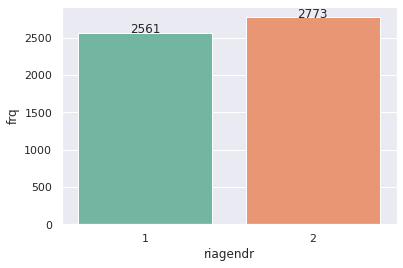

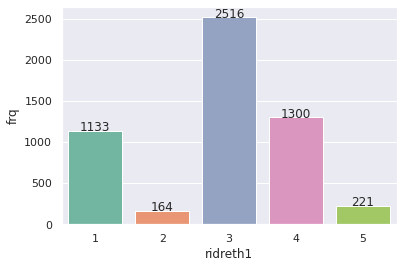

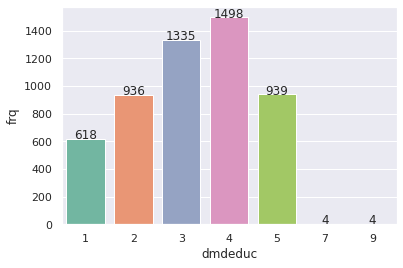

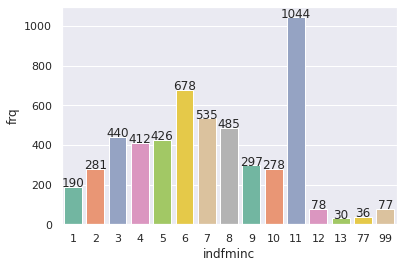

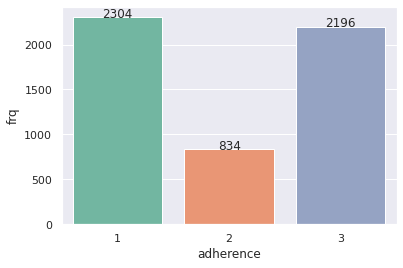

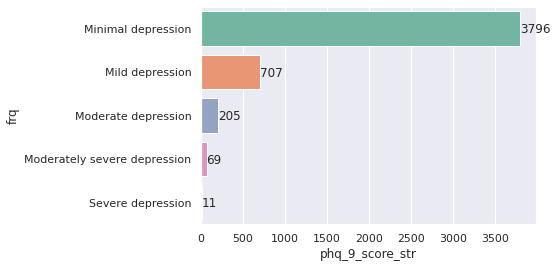

In [141]:
categorical_variables = infer_phq_hei_curated_df.select_dtypes("category").columns

for category in categorical_variables:
    # rotate the orientation for this specific variable
    if category == "phq_9_score_str":
        ax = sns.countplot(
            y=category,
            data=infer_phq_hei_curated_df,
            palette="Set2",
        )
        _ = plt.xlabel(category)
        _ = plt.ylabel("frq")

        # to put the values on the axes
        for p in ax.patches:
            ax.annotate(
                "{}".format(p.get_width()), (p.get_width(), p.get_y() + 0.5), ha="left"
            )
    else:
        ax = sns.countplot(
            x=category,
            data=infer_phq_hei_curated_df,
            palette="Set2",
        )
        _ = plt.xlabel(category)
        _ = plt.ylabel("frq")

        # to put the values on the axes
        for p in ax.patches:
            ax.annotate(
                "{}".format(p.get_height()),
                (p.get_x() + 0.4, p.get_height()),
                ha="center",
            )

    plt.show()

Conclusions:
- ...

### Numerical Variables

Let's analyze the numerical variables and see how our data are distributed. First, we can plot the histogram of those features.

In [146]:
numerical_variables = infer_phq_hei_curated_df.select_dtypes(["int64", "float64"]).columns

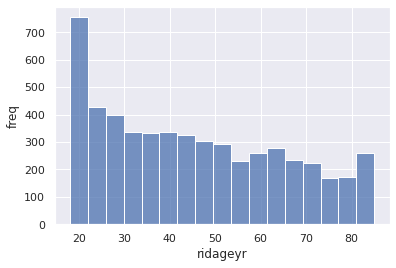

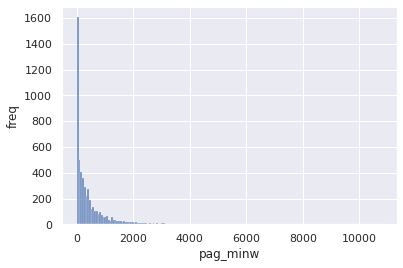

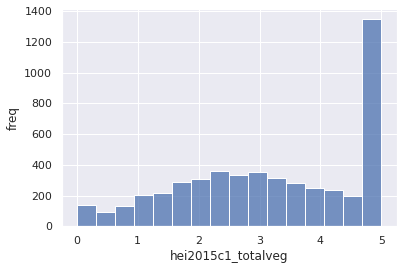

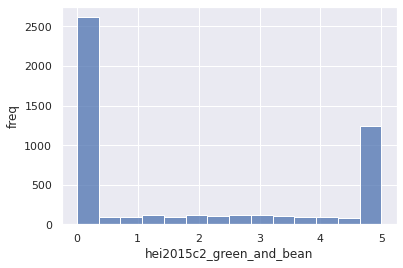

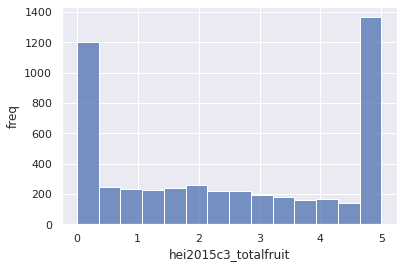

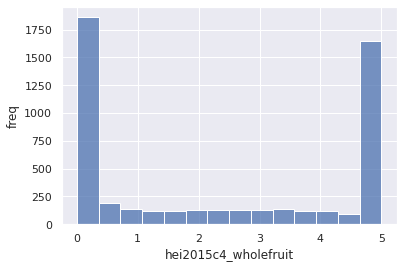

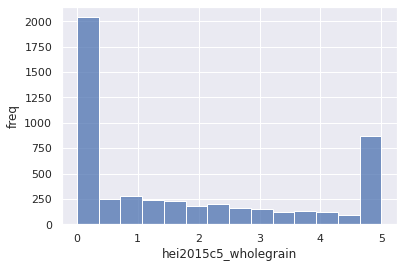

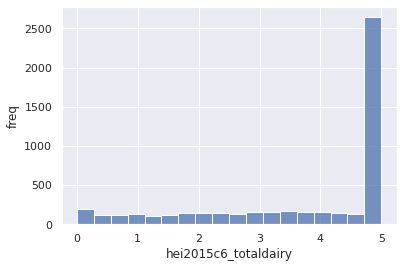

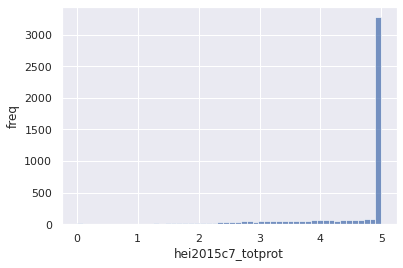

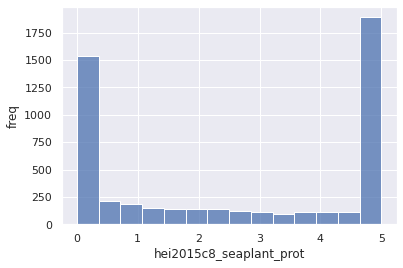

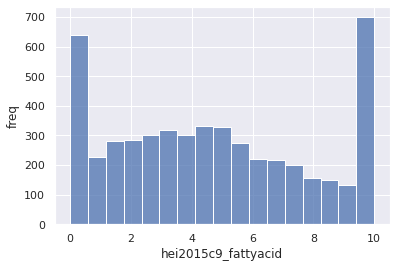

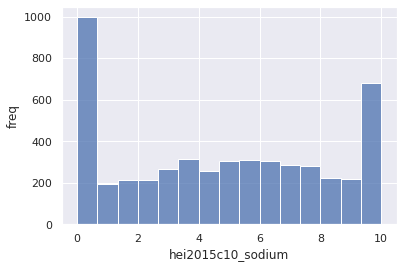

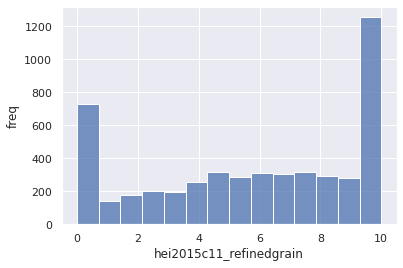

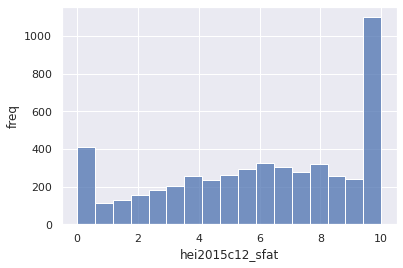

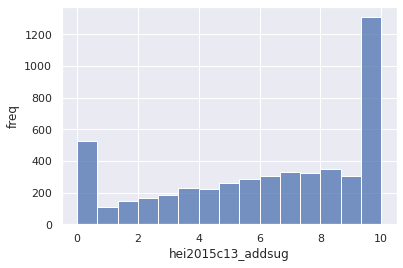

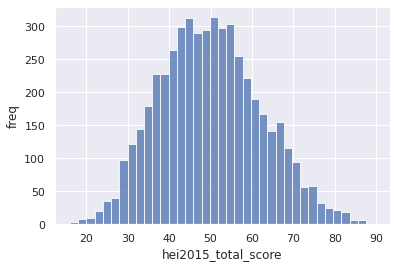

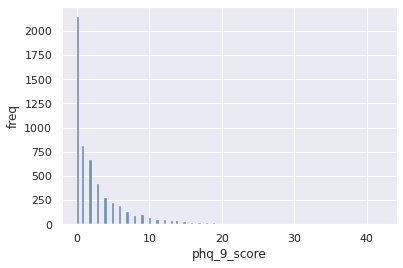

In [148]:
# histogram with a line on the limits of each food limit
for numeric in numerical_variables:
    if numeric != "seqn":
        _ = sns.histplot(x=numeric, data=infer_phq_hei_curated_df)
        _ = plt.xlabel(numeric)
        _ = plt.ylabel("freq")
        plt.show()

We observe that we have three kind of distributions with these variables: 

- some are skewed to right (positive):
  - **all health eating indexes, less the final total score**
- some are normal
  - **health eating index final score**
- and some of them have min and max greater than the rest of the observations
  - **phq_9_score, pag_minw and ridageyr**

### Looking at missing values

<AxesSubplot:>

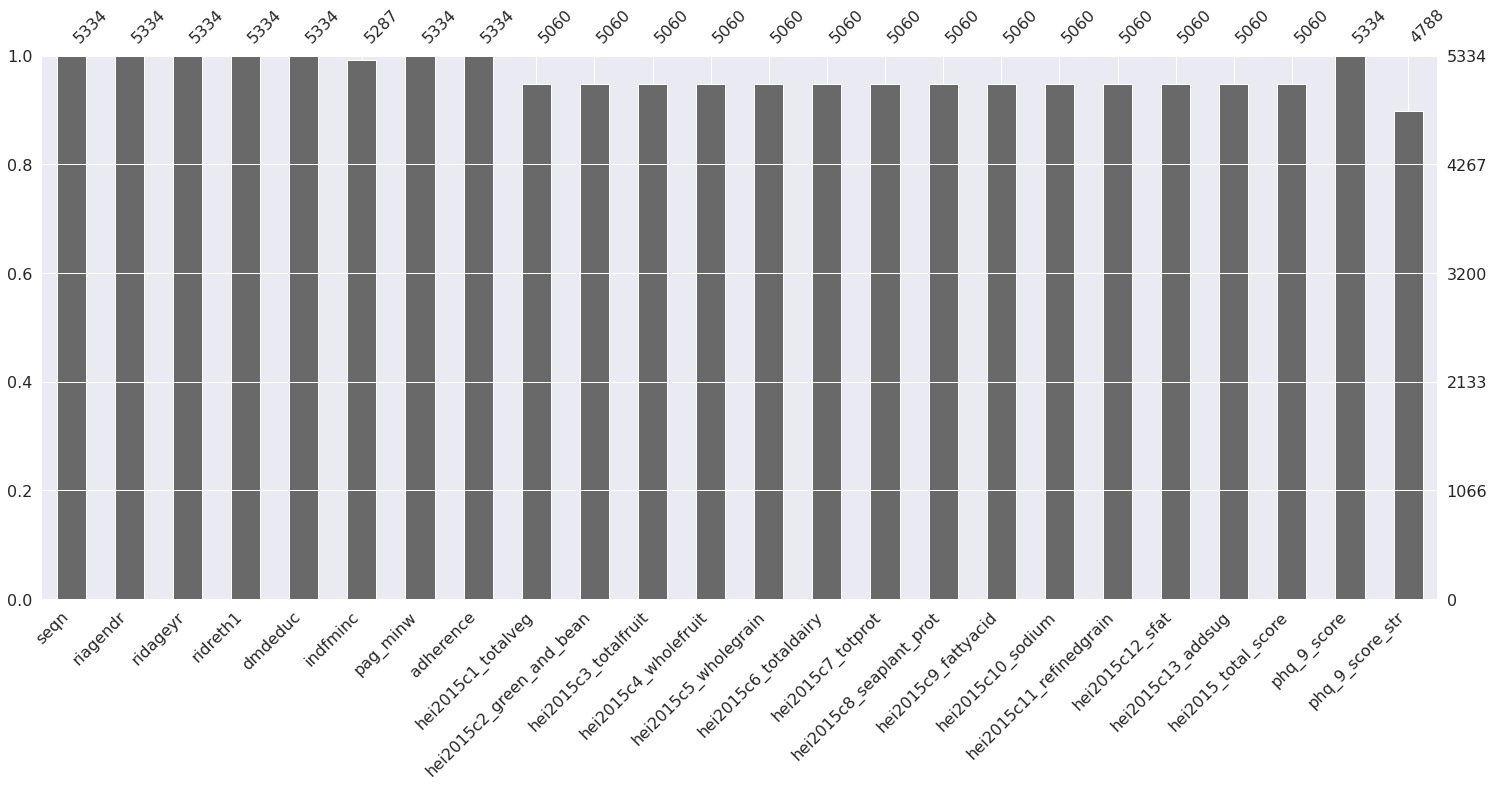

In [151]:
msno.bar(infer_phq_hei_curated_df)

<AxesSubplot:>

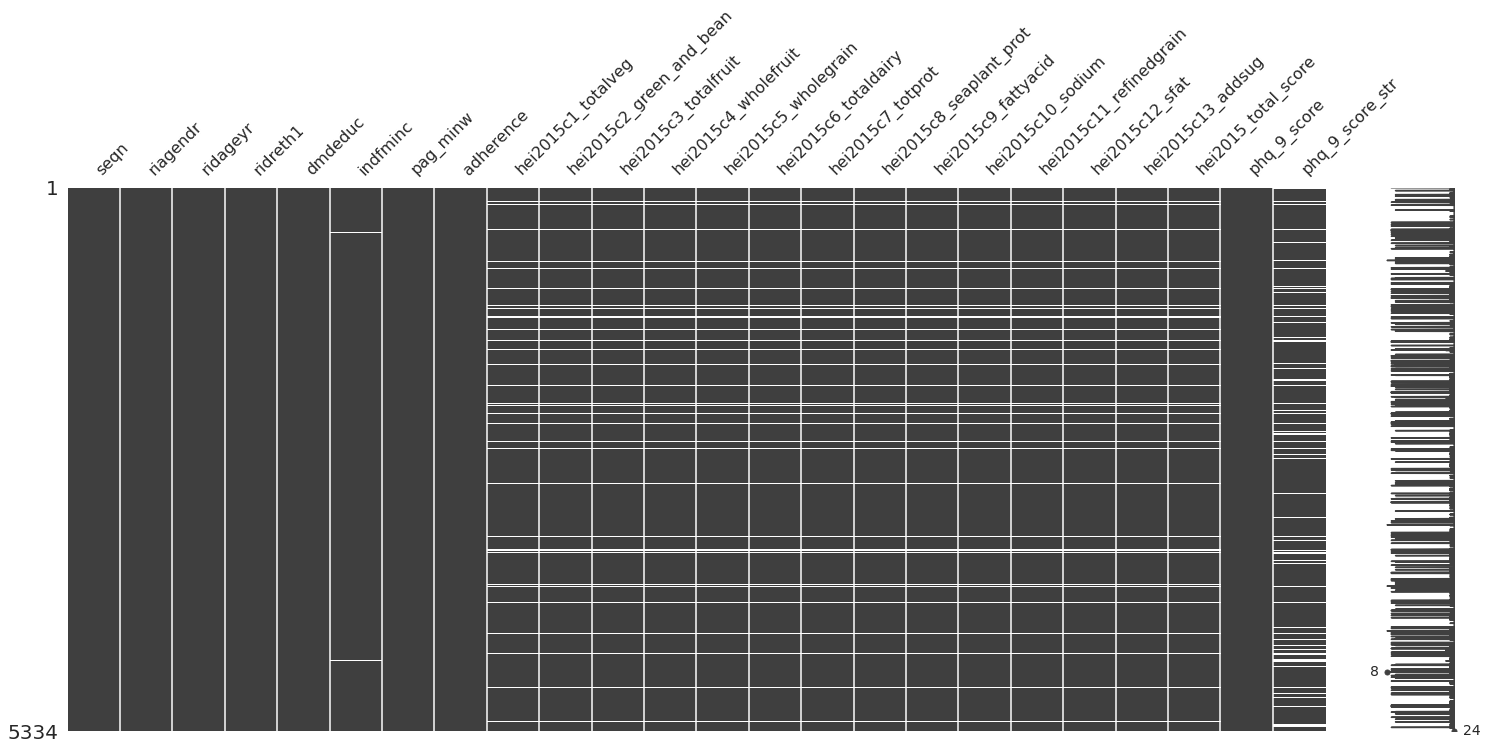

In [152]:
msno.matrix(infer_phq_hei_curated_df)

<AxesSubplot:>

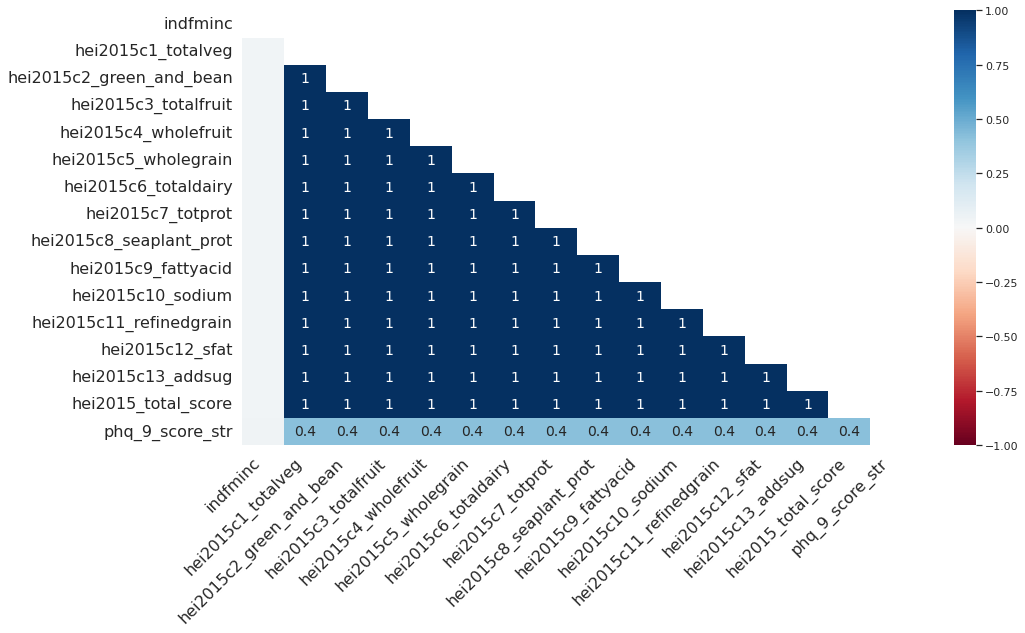

In [156]:
msno.heatmap(infer_phq_hei_curated_df, figsize=(15, 8))

As we can see, there is three kind of variables that missing values. One of them is on `pag_minw` feature, this will be treated together with the *index health features*. But now, I'd like to look at the `phq_9_score_str`.

As was said before, some answers for the **phq_9 survey** was missing, and because of that we do not addressed any depression label to those cases.

This approach endup generating 546 missing values on our dataset. As this is our most important feature, I'll perform some kind of imputation here.

### Imputing Missing Values

In [197]:
# phq_9_score variables
infer_phq_hei_curated_df[["phq_9_score_str", "phq_9_score"]]

,phq_9_score_str,phq_9_score
0,NaN,0.0
1,Minimal depression,0.0
2,Minimal depression,0.0
3,Minimal depression,0.0
4,Minimal depression,4.0
...,...,...
5329,Minimal depression,2.0
5330,Moderate depression,10.0
5331,Minimal depression,2.0
5332,Minimal depression,0.0


Here, I'll be using the distribution of the `phq_9_score_str` to investigate the probability to take some kind of depression if we randomly collect one observation of this data. To accomplish that, we'll be performing a bootstrap sampling.

Bootstrap sampling is just sampling with replacement, here is a reference from [wikipedia](https://pt.wikipedia.org/wiki/Bootstrapping_(estat%C3%ADstica)).

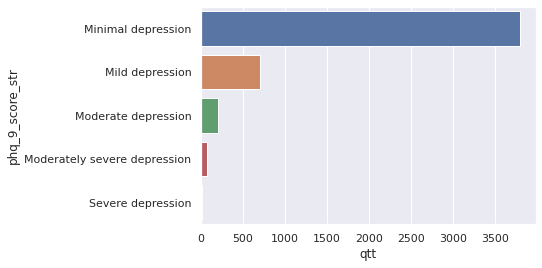

In [199]:
# lets just remember how our phq_9_score_str is distributed
_ = sns.countplot(y="phq_9_score_str", data=infer_phq_hei_curated_df)
_ = plt.ylabel("phq_9_score_str")
_ = plt.xlabel("qtt")
plt.show()

See, we have a lot of *"Minimal depression"*, so, was interesting if we could measure the probability of appear each kind of depression, based on this distribution. Let's do this!!

In [198]:
# first, drop the missings on phq_9_score_str
phq_9_score_str_serie = infer_phq_hei_curated_df["phq_9_score_str"].dropna(inplace=False)

# run the experiment 10000 times: collecting just one observation at a time
n_bst = 10000
ten_thousand_bootstrap_sampling = [phq_9_score_str_serie.sample(1).values.tolist()[0] for _ in range(n_bst)]

# Counter will just counting how many observations was observed on each kind of depression type
counting_bootstrap_samples = Counter(ten_thousand_bootstrap_sampling)
counting_bootstrap_samples

Counter({'Minimal depression': 7880,
         'Moderately severe depression': 145,
         'Mild depression': 1486,
         'Moderate depression': 468,
         'Severe depression': 21})

In [194]:
# here we'll just take the percentage dividing by the number of time that the experiment was performed
pct_bootstrap_samples = {}
for key, value in counting_bootstrap_samples.items():
    pct_bootstrap_samples[key] = value/n_bst

pct_bootstrap_samples

{'Minimal depression': 0.8005,
 'Severe depression': 0.0023,
 'Mild depression': 0.1404,
 'Moderate depression': 0.0416,
 'Moderately severe depression': 0.0152}

In [191]:
counting_bootstrap_samples

Counter({'Minimal depression': 0.7878,
         'Mild depression': 0.1482,
         'Moderate depression': 0.0476,
         'Moderately severe depression': 0.0138,
         'Severe depression': 0.0026})

As we can see from the procedure before, there is approximately 78% chance to be categorized as "Minimal depression". We can use that to impute those missing values.